In [ ]:
import videopipeline as vpl
import numpy as np

In [21]:
def add_suffix(path, suffix, new_ext='.mp4'):
    return path.replace('.mp4', f'-{suffix}{new_ext}')

def draw(*images):
    ref = images[0].shape
    assert len(images) == 9, images.shape
    
    out_image = np.zeros((ref[0] * 2, ref[1] * 5))
    asdf = [images[:5], images[5:]]
    for i, row in enumerate(asdf):
        for j, img in enumerate(row):
            out_image[i * ref[0] : (i+1) * ref[0], j * ref[1] : (j+1) * ref[1]] = img
    
    return out_image

In [22]:
"""
video_path = r"videos/2.mp4"
img_size = (1000, 1000)
crop_pos = (0, 800)

video_path = r"videos/3.mp4"
img_size = (1000, 1000)
crop_pos = (0, 800)

video_path = r"videos/4.mp4"
img_size = (1000, 1000)
crop_pos = (0, 800)

video_path = r"videos/5.mp4"
img_size = (1000, 1000)
crop_pos = (0, 800)
"""

video_path = r"videos/1.mp4"
img_size = (800, 1000)
crop_pos = (200, 800)

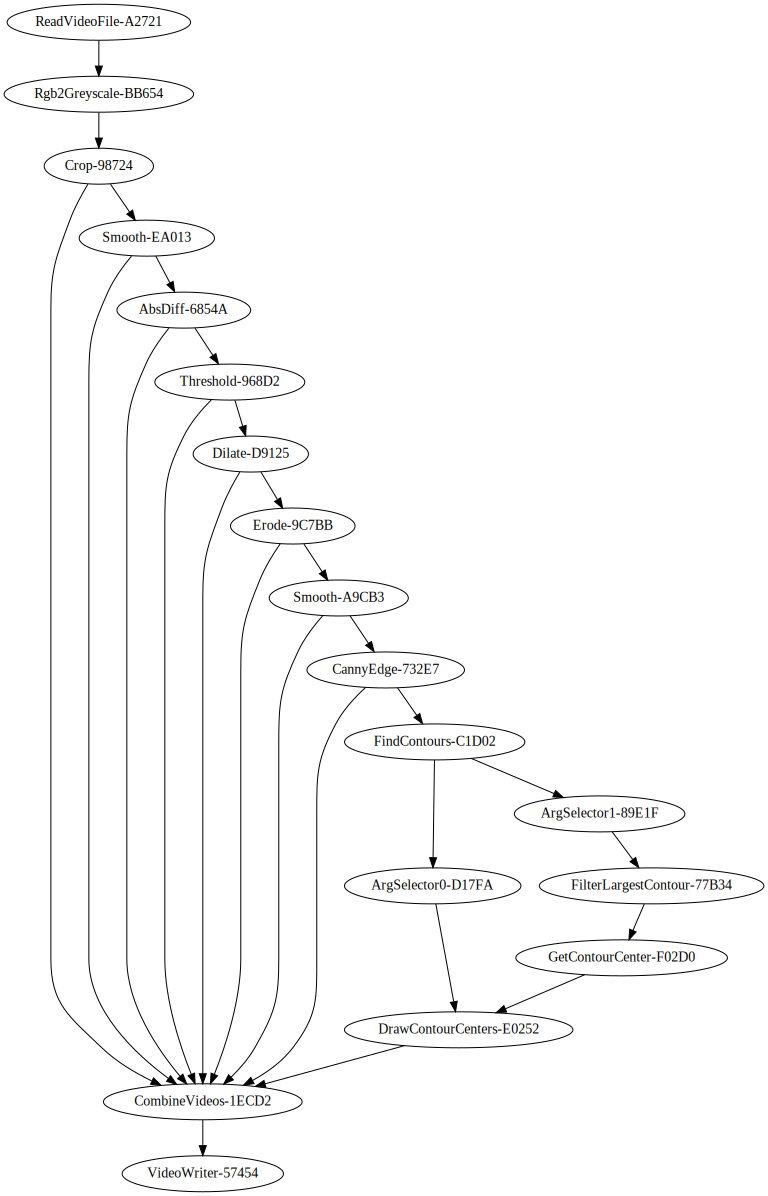

In [24]:
# Absprung detector
raw_video = vpl.generators.ReadVideoFile(video_path)
grey = vpl.functions.Rgb2Greyscale()(raw_video)
crop = vpl.functions.Crop(crop_pos, img_size)(grey)
smooth1 = vpl.functions.Smooth(101)(crop)
abs_diff = vpl.functions.AbsDiff()(smooth1)
threshold = vpl.functions.Threshold(32)(abs_diff)
dilate = vpl.functions.Dilate(100)(threshold)
erode = vpl.functions.Erode(100)(dilate)
smooth2 = vpl.functions.Smooth(11)(erode)
canny_edge = vpl.functions.CannyEdge(1, 100)(smooth2)
find_contours = vpl.functions.FindContours()(canny_edge)

largest_contours = vpl.functions.FilterLargestContour()(find_contours[1])
contour_center = vpl.functions.GetContourCenter()(largest_contours)

contour_center_drawn = vpl.functions.DrawContourCenters()([find_contours[0], contour_center])
combined = vpl.core.Function(draw, name="CombineVideos")([crop, smooth1, abs_diff, threshold, dilate, erode, smooth2, canny_edge, contour_center_drawn])
writer = vpl.actions.VideoWriter(add_suffix(video_path, "combined"), 30, aggregate=True, collect=False, verbose=True)(combined)

p = vpl.core.Pipeline(writer)
p.render_model()

In [5]:
# Run pipeline
p()